### Loading the data 

In [1]:
import pandas as pd
df = pd.read_csv('Landslides.csv')

In [2]:
df.head(21)

,id,date,time,country,nearest_places,hazard_type,landslide_type,trigger,storm_name,fatalities,...,population,countrycode,continentcode,key,version,tstamp,changeset_id,latitude,longitude,geolocation
0,1,01/02/2007,NaN,United Kingdom,"Whitehaven, Cumbria",landslide,Landslide,Rain,NaN,1.0,...,24803.0,GB,EU,sGaiIKdcW,1.0,Tue Apr 01 2014 00:00:00 GMT+0000 (UTC),1.000000e+00,54.549400,-3.587500,"(54.549399999999999, -3.5874999999999999)"
1,2,01/03/2007,NaN,Peru,"Alto Mesapata, in the Pasco province",landslide,Complex,Rain,NaN,NaN,...,0.0,PE,SA,S95OsumK4,1.0,Tue Apr 01 2014 00:00:00 GMT+0000 (UTC),1.000000e+00,-10.383800,-75.426700,"(-10.383800000000001, -75.426699999999997)"
2,3,01/05/2007,NaN,Brazil,"Nova Friburgo, Rio de Janeiro",landslide,Landslide,Rain,NaN,7.0,...,153361.0,BR,SA,D5vlNdgB7,1.0,Tue Apr 01 2014 00:00:00 GMT+0000 (UTC),1.000000e+00,-22.282346,-42.536362,"(-22.282346350000001, -42.536362050000001)"
3,4,01/05/2007,NaN,Brazil,"Sumidouro, Rio de Janeiro",landslide,Landslide,Rain,NaN,2.0,...,11555.0,BR,SA,h5J8IFdc4,1.0,Tue Apr 01 2014 00:00:00 GMT+0000 (UTC),1.000000e+00,-22.045200,-42.673400,"(-22.045200000000001, -42.673400000000001)"
4,5,01/05/2007,NaN,Brazil,"Jundiai, Sao Paulo",landslide,Landslide,Rain,NaN,1.0,...,54415.0,BR,SA,s5Zb5FdB4,1.0,Tue Apr 01 2014 00:00:00 GMT+0000 (UTC),1.000000e+00,-23.231100,-46.613600,"(-23.231100000000001, -46.613599999999998)"
5,6,01/05/2007,NaN,Pakistan,"Hallar Bridge, Kotli",landslide,Landslide,Rain,NaN,13.0,...,0.0,PK,AS,sJDdkfmQU,1.0,Tue Apr 01 2014 00:00:00 GMT+0000 (UTC),1.000000e+00,33.545200,73.706200,"(33.545200000000001, 73.706199999999995)"
6,7,01/08/2007,NaN,Brunei,Bandar Seri Begawan,landslide,Landslide,Rain,NaN,NaN,...,64409.0,BN,AS,hJ_aZPKB4,1.0,Tue Apr 01 2014 00:00:00 GMT+0000 (UTC),1.000000e+00,4.983300,114.917000,"(4.9832999999999998, 114.917)"
7,8,01/08/2007,NaN,Indonesia,"Sungai Sariak, Sumatra",landslide,Complex,Rain,NaN,28.0,...,0.0,ID,AS,DJR_uPcB4,1.0,Tue Apr 01 2014 00:00:00 GMT+0000 (UTC),1.000000e+00,0.066700,100.983300,"(0.066699999999999995, 100.9833)"
8,9,01/11/2007,NaN,Philippines,"Inupuan in Barangay Mainit, Nabunturan, Compos...",landslide,Landslide,Unknown,NaN,6.0,...,6148.0,PH,AS,D5F2sIZeFD,2.0,Fri Sep 12 2014 20:04:31 GMT+0000 (UTC),3.141049e+09,7.531400,126.013000,"(7.5313999999999997, 126.01300000000001)"
9,10,01/13/2007,NaN,Sri Lanka,"Nuwara Eliya, Sri Lanka",landslide,Landslide,Rain,NaN,2.0,...,25775.0,LK,AS,SJg9EkcQW,1.0,Tue Apr 01 2014 00:00:00 GMT+0000 (UTC),1.000000e+00,6.965800,80.757700,"(6.9657999999999998, 80.7577)"


In [3]:
df.shape

(9564, 34)

In [4]:
df.isnull().sum()

id                         0
date                       1
time                    5540
country                 3397
nearest_places            92
hazard_type                9
landslide_type            18
trigger                  756
storm_name              9014
fatalities              1352
injuries                5622
source_name             4019
source_link             1331
location_description    5455
location_accuracy          2
landslide_size           790
photos_link             8575
cat_src                   36
cat_id                    34
countryname               42
near                      35
distance                  34
adminname1               117
adminname2              3022
population                34
countrycode               44
continentcode           3810
key                       28
version                    9
tstamp                     9
changeset_id               9
latitude                   0
longitude                  0
geolocation                0
dtype: int64

## Cleaning the Data (Preprocessing)

In [5]:
#clean data
#time cleaning
import numpy as np
df = df.drop(['time','storm_name','adminname1','adminname2','source_name','photos_link'], axis = 1)


In [6]:
#df = df[pd.notnull(df['country', 'location_description','source_link','fatalities','injuries'])]
df = df.dropna(subset=['injuries','location_description','continentcode','country','fatalities','source_link'])

In [14]:
df.shape

(287, 28)

While this was a quick way to clean the NaN's it changed the shape of data, so we will need to change the way we clean the NaN's

In [7]:
df.head(16)

,id,date,country,nearest_places,hazard_type,landslide_type,trigger,fatalities,injuries,source_link,...,population,countrycode,continentcode,key,version,tstamp,changeset_id,latitude,longitude,geolocation
83,84,06/11/2007,Bangladesh,Chittagong,landslide,Landslide,Monsoon,128.0,150.0,http://en.wikipedia.org/wiki/2007_Chittagong_m...,...,3920222.0,BD,AS,sGnMdsFuU6,2.0,Wed Dec 16 2015 20:58:54 GMT+0000 (UTC),2.634824e+09,22.355500,91.820500,"(22.355499999999999, 91.820499999999996)"
484,482,03/20/2008,Philippines,"riverside in Santa Maria, Davao del Sur",landslide,Landslide,Downpour,4.0,10.0,http://www.gmanews.tv/story/85638/3-killed-inf...,...,7506.0,PH,AS,sGOLQyMjiN,2.0,Fri Jan 08 2016 17:44:37 GMT+0000 (UTC),2.046303e+09,6.530900,125.461600,"(6.5308999999999999, 125.4616)"
783,781,09/08/2008,China,"Taoshi, Shanxi",landslide,Complex,Dam_Embankment_Collapse,277.0,33.0,http://www.abc.net.au/news/stories/2008/09/09/...,...,0.0,CN,AS,SJE-5oHhHM,2.0,Tue Aug 18 2015 22:15:38 GMT+0000 (UTC),1.783953e+09,35.885300,111.583700,"(35.885300000000001, 111.58369999999999)"
1036,1034,06/03/2009,Myanmar,"Shwe Min Wun ward, Kawhthaung, Tenessarim divi...",landslide,Landslide,Downpour,4.0,3.0,http://mizzimaenglish.blogspot.com/2009/06/lan...,...,24561.0,MM,AS,h9EV9P8vFs,1.0,Tue Apr 01 2014 00:00:00 GMT+0000 (UTC),1.000000e+00,10.000280,98.548662,"(10.00028043, 98.548661589999995)"
1187,1186,12/28/2009,Ecuador,"near Chihuiple, Santo Domingo de los Tsachilas",landslide,Mudslide,Downpour,3.0,5.0,http://www.laht.com/article.asp?ArticleId=3279...,...,200421.0,EC,SA,S5UROleVi6,2.0,Tue Jan 12 2016 21:20:05 GMT+0000 (UTC),3.322795e+09,-0.315200,-78.972400,"(-0.31519999999999998, -78.972399999999993)"
1262,1261,10/15/2009,Philippines,Km 18 of the Halsema Highway in Tublay town,landslide,Landslide,Tropical_Cyclone,0.0,0.0,http://www.gmanews.tv/story/174680/rains-trigg...,...,6371.0,PH,AS,hGE4M7ydv6,2.0,Wed Jan 06 2016 18:57:10 GMT+0000 (UTC),3.434282e+09,16.494600,120.652400,"(16.494599999999998, 120.6524)"
1364,1365,12/17/2009,Greece,Tempi Valley,landslide,Rockfall,Rain,1.0,2.0,http://www.hri.org/news/greek/apeen/2009/09-12...,...,2113.0,GR,EU,SJ_J5YqeC6,2.0,Mon Jan 11 2016 14:45:31 GMT+0000 (UTC),4.104331e+09,39.875223,22.570308,"(39.875222999999998, 22.570307700000001)"
1466,1465,02/03/2010,Ecuador,Chinchin,landslide,Mudslide,Downpour,4.0,2.0,http://www.laht.com/article.asp?ArticleId=3517...,...,9501.0,EC,SA,sJeW69zViI,2.0,Tue Jan 12 2016 22:45:01 GMT+0000 (UTC),3.183751e+09,-1.383300,-78.316700,"(-1.3833, -78.316699999999997)"
1556,1554,03/11/2010,Croatia,Krilo Jesenice between Split amd Omis,landslide,Rockfall,Downpour,0.0,2.0,https://web.archive.org/web/20101017232810/htt...,...,2169.0,HR,EU,D92tlGawvI,2.0,Mon Jan 11 2016 15:48:21 GMT+0000 (UTC),3.121742e+09,43.457400,16.611400,"(43.4574, 16.6114)"
1576,1574,03/15/2010,Macedonia,train tracks 7 km from Gostivar to Kicevo,landslide,Landslide,Downpour,0.0,4.0,http://www.invest-in-macedonia.com/business-an...,...,3629.0,MK,EU,sGyy3yfwvN,2.0,Mon Jan 11 2016 14:58:57 GMT+0000 (UTC),1.677446e+09,41.739600,20.930600,"(41.739600000000003, 20.930599999999998)"


## Analysis (information we can find)

In [8]:
df.describe()

,id,fatalities,injuries,cat_id,distance,population,version,changeset_id,latitude,longitude
count,287.000000,287.000000,287.000000,287.000000,287.000000,2.870000e+02,287.000000,2.870000e+02,287.000000,287.000000
mean,5603.463415,12.000000,2.926829,5582.432056,10.930849,2.091186e+05,1.271777,5.753982e+08,21.220902,67.884591
std,1170.783927,125.794093,17.449975,1192.395339,15.613289,8.976604e+05,0.445653,1.149706e+09,23.481959,58.314873
min,84.000000,0.000000,0.000000,84.000000,0.000030,0.000000e+00,1.000000,1.000000e+00,-46.774800,-78.972400
25%,5812.500000,0.000000,0.000000,5811.500000,1.579970,1.786500e+03,1.000000,1.000000e+00,5.314000,9.823900
50%,5960.000000,0.000000,0.000000,5959.000000,4.454340,1.067600e+04,1.000000,1.000000e+00,26.184400,83.601100
75%,6083.000000,3.000000,0.000000,6081.500000,12.788805,7.820050e+04,2.000000,2.252857e+08,39.522300,110.283250
max,7401.000000,2100.000000,225.000000,7000.000000,111.288580,1.269184e+07,2.000000,4.246033e+09,65.979400,178.267800


## Let's graph some data

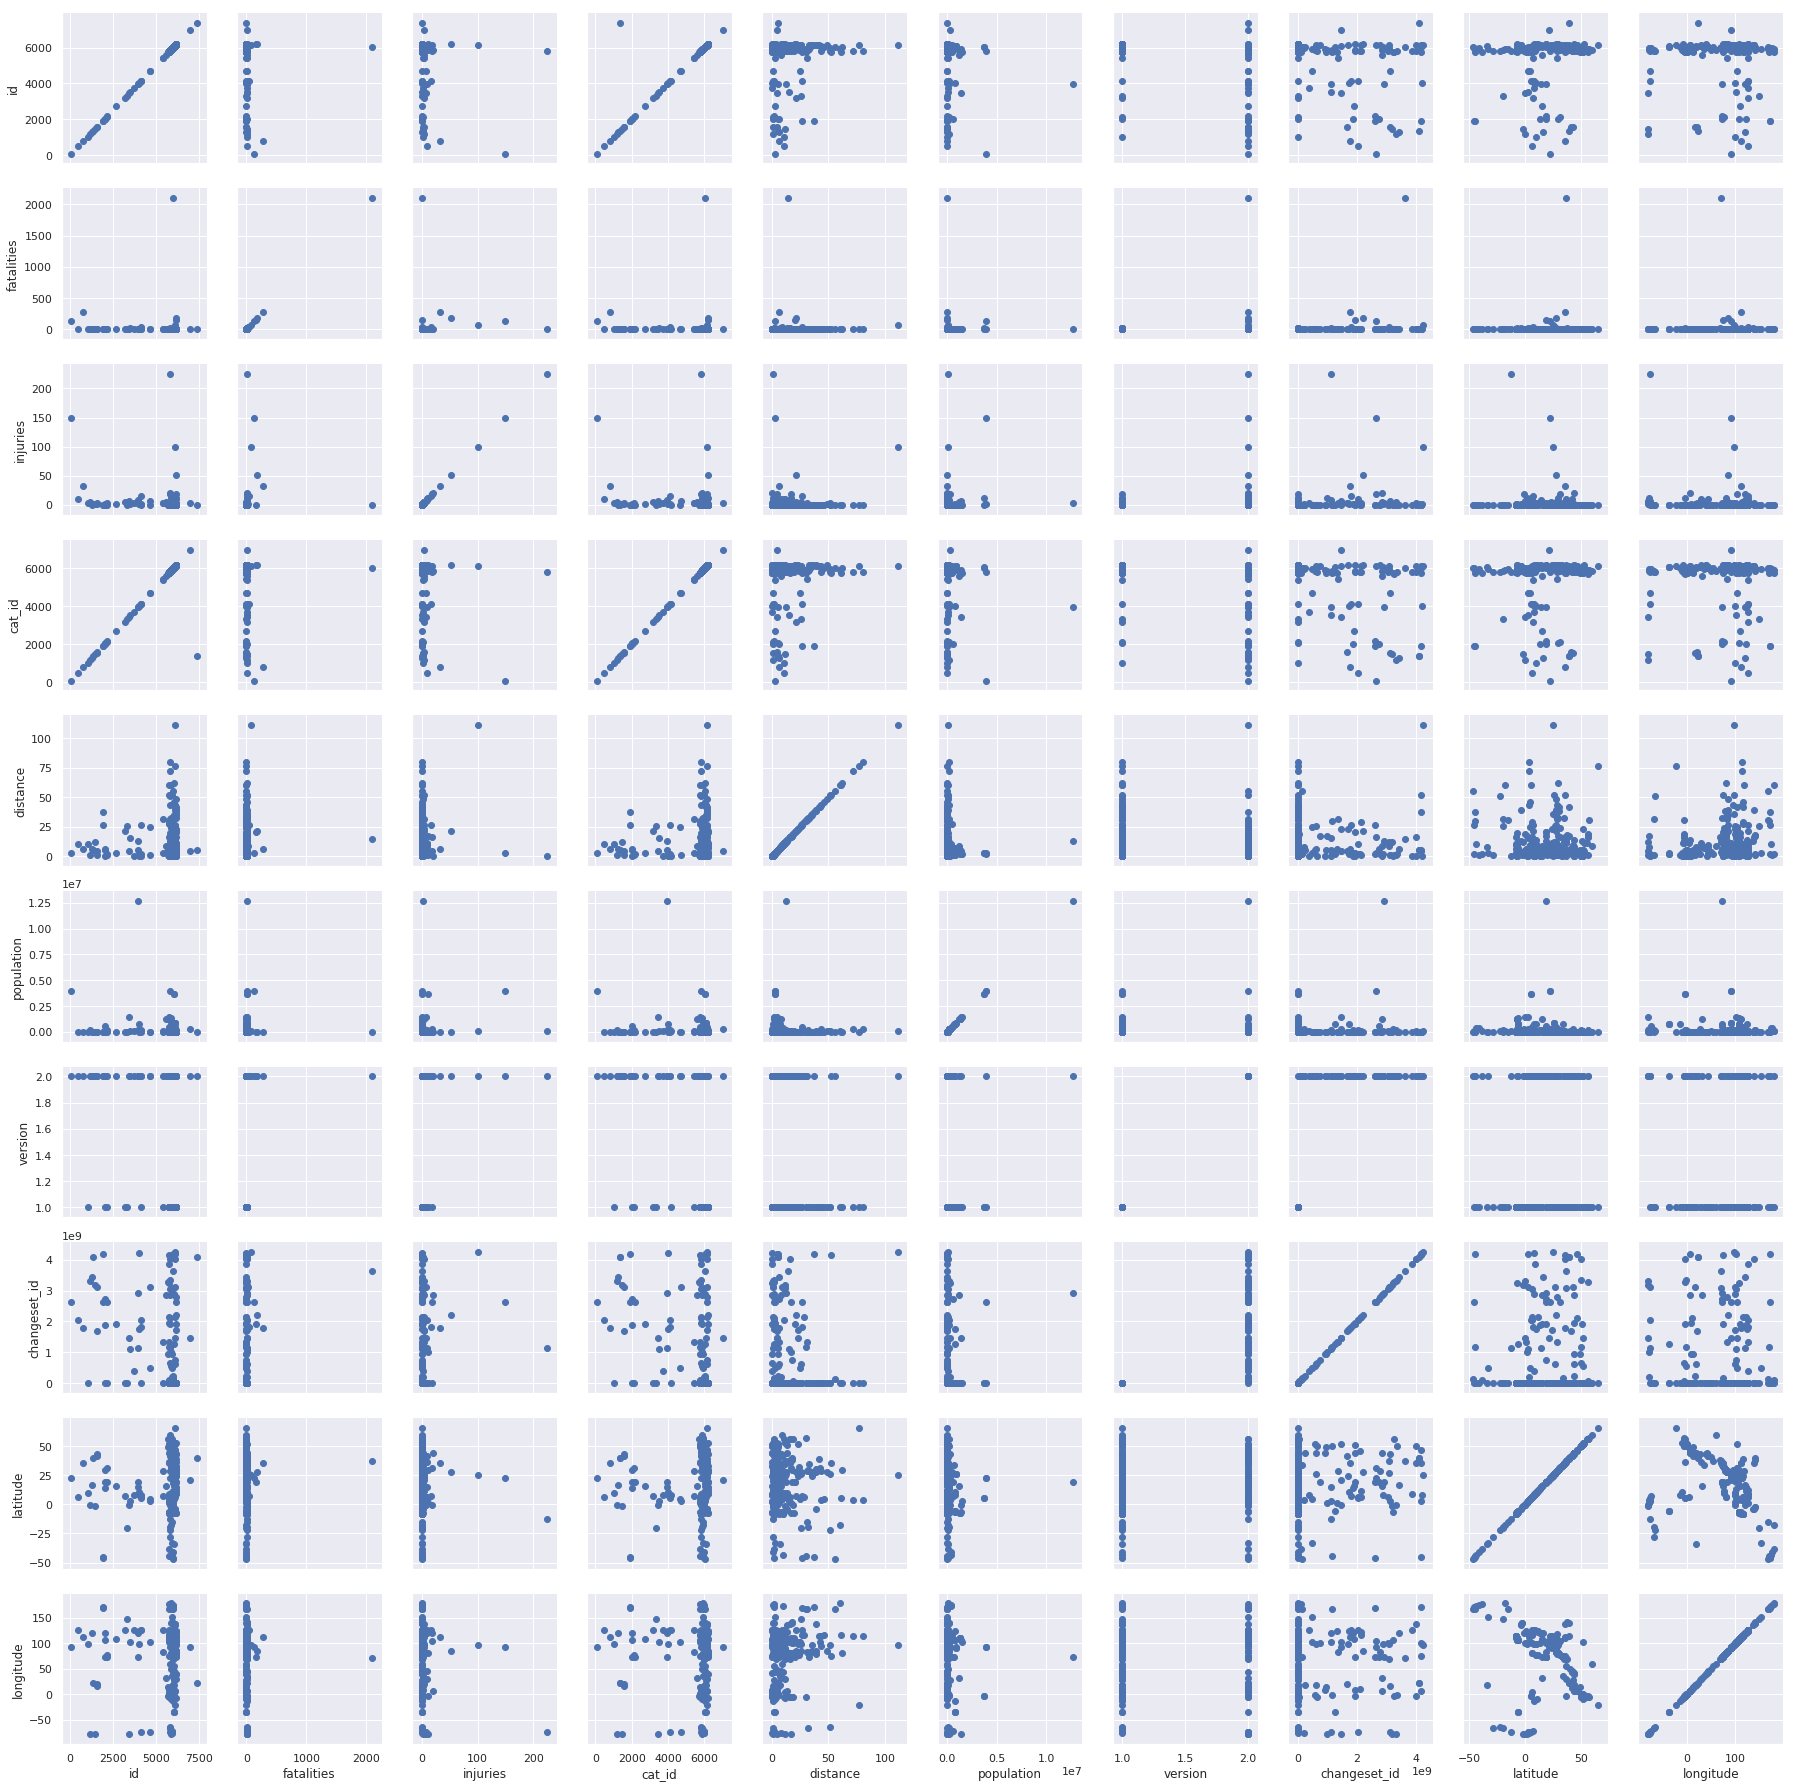

In [12]:
import seaborn as sns
import matplotlib as plt
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
g = sns.PairGrid(df)
g = g.map(plt.scatter)
g

What questions are there to ask here? Well first we will look at the location paterns for landslide and other diasters. Next we need to look at the rate of fatalities and injuries even though most of them were NaN. 

UK, Indonesia, India, China, Nepal are our top countrys 

In [21]:
df.country.value_counts()

United Kingdom                 38
Indonesia                      34
India                          31
China                          24
Nepal                          21
Malaysia                       14
Philippines                    12
New Zealand                     9
Phillipines                     7
Thailand                        7
Bangladesh                      5
Russia                          5
Georgia                         4
Italy                           4
Columbia                        4
Myanmar                         3
Bosnia                          3
Pakistan                        3
Japan                           3
Kashmir                         3
Afghanistan                     3
Switzerland                     2
Ivory Coast (Cote d'Ivoire)     2
France                          2
Bolivia                         2
Ireland                         2
Scottland                       2
Australia                       2
Ecuador                         2
Greece        

NameError: name 'diamonds' is not defined

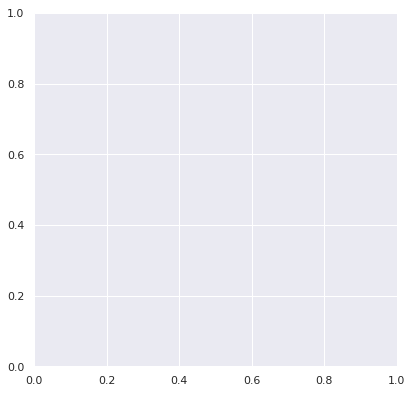

In [24]:
f, ax = plt.subplots(figsize=(6.5, 6.5))
sns.despine(f, left=True, bottom=True)
clarity_ranking = ["I1", "SI2", "SI1", "VS2", "VS1", "VVS2", "VVS1", "IF"]
sns.scatterplot(x="df.country['United Kingdom']", y="df.injuries",
                hue="clarity", size="depth",
                palette="ch:r=-.2,d=.3_r",
                hue_order=clarity_ranking,
                sizes=(1, 8), linewidth=0,
                data=diamonds, ax=ax)

In [ ]:
df.isnull().sum()

In [ ]:
import astropy.units as u
import astropy.coordinates as coord
import numpy as np

# Set up matplotlib and use a nicer set of plot parameters
import matplotlib


In [ ]:
from astropy.io import ascii

In [ ]:
from_geo

In [ ]:
plt.figure(figsize=(8, 8))
m = Basemap(projection='ortho', resolution=None, lat_0=50, lon_0=-100)
m.bluemarble(scale=0.5);

In [ ]:
fig = plt.figure(figsize=(8, 8))
m = Basemap(projection='lcc', resolution=None,
            width=8E6, height=8E6, 
            lat_0=45, lon_0=-100,)
m.etopo(scale=0.5, alpha=0.5)

# Map (long, lat) to (x, y) for plotting
x, y = m(-122.3, 47.6)
plt.plot(x, y, 'ok', markersize=5)
plt.text(x, y, ' Seattle', fontsize=12);

In [ ]:
from itertools import chain

def draw_map(m, scale=0.2):
    # draw a shaded-relief image
    m.shadedrelief(scale=scale)
    
    # lats and longs are returned as a dictionary
    lats = m.drawparallels(np.linspace(-90, 90, 13))
    lons = m.drawmeridians(np.linspace(-180, 180, 13))

    # keys contain the plt.Line2D instances
    lat_lines = chain(*(tup[1][0] for tup in lats.items()))
    lon_lines = chain(*(tup[1][0] for tup in lons.items()))
    all_lines = chain(lat_lines, lon_lines)
    
    # cycle through these lines and set the desired style
    for line in all_lines:
        line.set(linestyle='-', alpha=0.3, color='w')

In [ ]:
fig = plt.figure(figsize=(8, 6), edgecolor='w')
m = Basemap(projection='cyl', resolution=None,
            llcrnrlat=-90, urcrnrlat=90,
            llcrnrlon=-180, urcrnrlon=180, )
draw_map(m)

In [ ]:
fig = plt.figure(figsize=(8, 6), edgecolor='w')
m = Basemap(projection='moll', resolution=None,
            lat_0=0, lon_0=0)
draw_map(m)

In [ ]:
fig = plt.figure(figsize=(8, 8))
m = Basemap(projection='ortho', resolution=None,
            lat_0=50, lon_0=0)
draw_map(m);

In [ ]:
fig = plt.figure(figsize=(8, 8))
m = Basemap(projection='lcc', resolution=None,
            lon_0=0, lat_0=50, lat_1=45, lat_2=55,
            width=1.6E7, height=1.2E7)
draw_map(m)

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(12, 8))

for i, res in enumerate(['l', 'h']):
    m = Basemap(projection='gnom', lat_0=57.3, lon_0=-6.2,
                width=90000, height=120000, resolution=res, ax=ax[i])
    m.fillcontinents(color="#FFDDCC", lake_color='#DDEEFF')
    m.drawmapboundary(fill_color="#DDEEFF")
    m.drawcoastlines()
    ax[i].set_title("resolution='{0}'".format(res));

In [ ]:
import pandas as pd


# Extract the data we're interested in
lat = df['latitude'].values
lon = df['longitude'].values
population = df['population'].values
area = df['nearest_places'].values

In [ ]:
# 1. Draw the map background
fig = plt.figure(figsize=(8, 8))
m = Basemap(projection='lcc', resolution='h', 
            lat_0=37.5, lon_0=-119,
            width=1E6, height=1.2E6)
m.shadedrelief()
m.drawcoastlines(color='gray')
m.drawcountries(color='gray')
m.drawstates(color='gray')

# 2. scatter city data, with color reflecting population
# and size reflecting area
m.scatter(lon, lat, latlon=True,
          c=np.log10(population), s=area,
          cmap='Reds', alpha=0.5)

# 3. create colorbar and legend
plt.colorbar(label=r'$\log_{10}({\rm population})$')
plt.clim(3, 7)

# make legend with dummy points
for a in [100, 300, 500]:
    plt.scatter([], [], c='k', alpha=0.5, s=a,
                label=str(a) + ' km$^2$')
plt.legend(scatterpoints=1, frameon=False,
           labelspacing=1, loc='lower left');